In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [57]:
df = pd.read_csv('telco-churn.csv')
len(df)

7043

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.head().T # transpose of our dataframe

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.dtypes
# here we look at the data types of the column , pandas automatically determine the proper type of each column
# but sometimes these types aren't what we want it to be hence we need to change it

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# here we can see that TotalCharges is considered as object but it should be of int or float type
# object means string value
# SeniorCitizen is int but it should be object as user will type yes or no which is string
# there might be " " space in between for missing values hence pandas declare them as object in a row full of numbers

total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')


In [7]:
# this are all the customerID where there is blank in total charges

df[total_charges.isnull()][['customerID', 'TotalCharges']]

#  We can spot non-numeric data in a column by parsing the content as numeric and see at the rows
# where the parsing fails

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [8]:
# The errors='coerce' parameter is used to handle errors that occur during the conversion process. When set to 'coerce,'
# it means that if any value in the 'TotalCharges' column cannot be converted to a numeric data type, pandas will replace
# that value with NaN (Not a Number) instead of raising an error. This is a way to handle invalid or non-numeric data
# gracefully.

df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state = 42)

#train_test_split shuffles the orignal dataframe and then splits it into two parts for testing and training

In [14]:
df_train_full.head()

#here due to shuffling the indices appeared to be randomly ordered


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
2142,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.80,0
1623,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.45,0
6074,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.45,1
1362,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.95,1
6754,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,0.00,0


In [15]:
df_train , df_val = train_test_split(df_train_full, test_size = 0.33, random_state=42)

In [16]:
# now lets take our target variables and remove them from our DataFrame

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']



***EXPLORATORY DATA ANALYSIS***

In [17]:
# EXPLORATORY DATA ANALYSIS

print(df_train_full.isnull().sum())
len(df_train_full.isnull().sum())

# here we can see that each and every column shows zero means that there are no null/missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


21

In [18]:
# 0 means that customers churned
# 1 means that customers didn't churned

df_train_full.churn.value_counts()

# here we can see that majority of the users didn't churn

# z = sum([4138, 1496])
# print(1496 / z)
# hence 0.2655 means that probablity of a customer churning is 26.55%

0    4138
1    1496
Name: churn, dtype: int64

In [19]:
# for churn proportion of churned users , or the probablity of churning is called churn rate

global_mean = df_train_full.churn.mean()
print(global_mean)
round(global_mean,3)

# here mean is as same as probablity because values that can be taken up is either 1 or 0 so if you add up all 1's then
# it will give you the number of churned users and divide by is the total number of data in our dataset

0.2655307064252751


0.266

In [20]:
# our churned data set is so called imbalanced-dataset there are almost 3 times the users who didnt churn then who did
# hence the non-churn class dominates the churn class
# our churn rate is 0.27 which is a strong indicator of class imbalance
# in balanced case both positive and negative classes are equally distributed among all obeservations

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
              'phoneservice', 'multiplelines', 'internetservice',
              'onlinesecurity', 'onlinebackup', 'deviceprotection',
              'techsupport', 'streamingtv', 'streamingmovies',
              'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [21]:
df_train_full[categorical].nunique()  # here nunique() is "number of unique"

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

many unique values might mean that there is data entry errors or inconsistencies,
here we dont have many unique values hence we dont need to do anything extra

NOW we will do ***feature selection*** hence choosing which feature to use and which variables will be useful for the model

It also gives us additional insights about the dataset and helps answer questions
like “What makes customers churn?” and “What are the characteristics of people who churn?”

In [22]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

# now we will look at the churn rates of males and females if the difference in churn rate is more then it is an
# important feature and our model should be trained on it as it set this group apart
# if difference is less then more or not its not an important feature

global_mean = df_train_full.churn.mean()

print(f'global mean {round(global_mean, 3)}')
print(f'female mean {round(female_mean,3)}')
print(f'male mean {round(male_mean,3)}')

# as these values are pretty close (male and female one's) it means that gender is not a very useful variable
# while predicting churn

global mean 0.266
female mean 0.271
male mean 0.26


In [23]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

print(f'partner == yes {round(partner_yes,3)}')
print(f'partner == no {round(partner_no,3)}')

# here there is significant difference in churn when there is partner or not hence this is an imporatant feature
# this all are called group rate and then there is a global rate as well which we calculated in above cell

partner == yes 0.201
partner == no 0.326


In [24]:
senior_yes = df_train_full[df_train_full.seniorcitizen == 1].churn.mean()
senior_no = df_train_full[df_train_full.seniorcitizen == 0].churn.mean()

print(f'senior == yes {round(senior_yes,3)}')
print(f'senior == no {round(senior_no,3)}')

# here also there is a large deviation

senior == yes 0.414
senior == no 0.237


***RISK RATIO***                                                
-> risk ratio is a ratio of (group_rate/global_rate)            
-> with the help of it we can determine about whether risk is there or not of churning                                    
->In statistics, the ratio between probabilities in
different groups is called risk ratio, where risk refers to the risk of having the effect. In our
case, the effect is churn, so it’s risk of churning
-> if the risk = 1(close to one ) means that customer is as likely to churn as any other customer means it is not risky     
-> if risk < 0.5 then customers are 2 times less likely to churn hence no risk                                        
-> if risk > 1(higher than 1) then group is called risky , a risk of 2 means that customers are 2 times more likely to churn                   

In [25]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.270841,0.005310,1.019998
male,0.260478,-0.005053,0.980971


In [26]:
df_group = df_train_full.groupby(by='partner').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
partner,,,
no,0.326446,0.060916,1.229411
yes,0.200733,-0.064798,0.755968


In [27]:
df_group = df_train_full.groupby(by='seniorcitizen').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

# hence by looking at the risks and differences we can choose important features
# and which users churn more often then other users

,mean,diff,risk
seniorcitizen,,,
0,0.237098,-0.028433,0.892922
1,0.413907,0.148377,1.558793


In [28]:
from IPython.display import display
# we use it as we can't use df in loop as it cant be rendered

for col in categorical :
  df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_mean
  df_group['risk'] = df_group['mean'] / global_mean
  display(df_group)

,mean,diff,risk
gender,,,
female,0.270841,0.005310,1.019998
male,0.260478,-0.005053,0.980971


,mean,diff,risk
seniorcitizen,,,
0,0.237098,-0.028433,0.892922
1,0.413907,0.148377,1.558793


,mean,diff,risk
partner,,,
no,0.326446,0.060916,1.229411
yes,0.200733,-0.064798,0.755968


,mean,diff,risk
dependents,,,
no,0.312326,0.046795,1.176233
yes,0.155674,-0.109856,0.586276


,mean,diff,risk
phoneservice,,,
no,0.253623,-0.011908,0.955156
yes,0.266824,0.001293,1.004871


,mean,diff,risk
multiplelines,,,
no,0.251397,-0.014134,0.946771
no_phone_service,0.253623,-0.011908,0.955156
yes,0.284105,0.018574,1.069952


,mean,diff,risk
internetservice,,,
dsl,0.191851,-0.073679,0.722521
fiber_optic,0.415558,0.150028,1.565010
no,0.076606,-0.188924,0.288502


,mean,diff,risk
onlinesecurity,,,
no,0.416014,0.150484,1.566727
no_internet_service,0.076606,-0.188924,0.288502
yes,0.145342,-0.120189,0.547363


,mean,diff,risk
onlinebackup,,,
no,0.398693,0.133162,1.501494
no_internet_service,0.076606,-0.188924,0.288502
yes,0.216531,-0.048999,0.815467


,mean,diff,risk
deviceprotection,,,
no,0.387706,0.122175,1.460117
no_internet_service,0.076606,-0.188924,0.288502
yes,0.226825,-0.038705,0.854234


,mean,diff,risk
techsupport,,,
no,0.413472,0.147941,1.557153
no_internet_service,0.076606,-0.188924,0.288502
yes,0.152855,-0.112676,0.575657


,mean,diff,risk
streamingtv,,,
no,0.335418,0.069887,1.263197
no_internet_service,0.076606,-0.188924,0.288502
yes,0.298945,0.033415,1.125841


,mean,diff,risk
streamingmovies,,,
no,0.333333,0.067803,1.255348
no_internet_service,0.076606,-0.188924,0.288502
yes,0.301320,0.035789,1.134784


,mean,diff,risk
contract,,,
month-to-month,0.426533,0.161002,1.606340
one_year,0.117987,-0.147544,0.444343
two_year,0.028379,-0.237151,0.106878


,mean,diff,risk
paperlessbilling,,,
no,0.16414,-0.101390,0.618159
yes,0.33594,0.070409,1.265164


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.174475,-0.091056,0.657080
credit_card_(automatic),0.152404,-0.113126,0.573961
electronic_check,0.449921,0.184390,1.694420
mailed_check,0.190328,-0.075203,0.716782


In [29]:
# HIGHER THE DEGREE OF DEPENDENCY MORE USEFULL THE FEATURE IS
# For categorical variables, one such metric is mutual information, which tells how much
# information we learn about one variable if we get to learn the value of the other variable

# if value of mutual information is high -> higher dependency -> useful feature
# if value of mutual information is low -> lower dependency -> not useful feature

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
  return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')
df_mi

,MI
contract,0.096652
onlinesecurity,0.063393
techsupport,0.060935
internetservice,0.053313
onlinebackup,0.045424
paymentmethod,0.042861
deviceprotection,0.042007
streamingtv,0.030844
streamingmovies,0.030705
paperlessbilling,0.019077


Positive correlation means that when one variable goes up, the other variable tends to
go up as well. In case of binary target, when the values of the variable are high, we see
ones more often than zeros. But when the values of the variable are low, zeros become
more frequent than ones.                                                 
 Zero correlation means no relationship between two variables: they are completely
independent.                                                    
 Negative correlation occurs when one variable goes up while the other goes down. In
the binary case, if the values are high, we see more zeros than ones in the target
variable. When the values are low, we see more ones.

In [30]:
# in above snippet the top 5 are the most important features and bottom 5 are useless features
# CORRELATION COEFFICIENT , used to find relationship between numerical features and target variable(churn)
# earlier we find relation between categorical and target variable

df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

Dataframe -> dictionaries -> Matrix -> Model

In [31]:
# to convert df to dictionaries we will use to_dict method

train_dict = df_train[categorical + numerical].to_dict(orient ='records') #records means rows
print(train_dict[0])

{'gender': 'female', 'seniorcitizen': 0, 'partner': 'no', 'dependents': 'no', 'phoneservice': 'yes', 'multiplelines': 'no', 'internetservice': 'fiber_optic', 'onlinesecurity': 'no', 'onlinebackup': 'no', 'deviceprotection': 'no', 'techsupport': 'no', 'streamingtv': 'no', 'streamingmovies': 'no', 'contract': 'month-to-month', 'paperlessbilling': 'yes', 'paymentmethod': 'electronic_check', 'tenure': 18, 'monthlycharges': 71.1, 'totalcharges': 1247.75}


In [32]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

# if feature is categorical it performs one-hot but if its numerical it leaves it intact

DictVectorizer(sparse=False)

In [33]:
X_train = dv.transform(train_dict)

In [34]:
X_train[0]

array([1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 7.11000e+01, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 1.80000e+01, 1.24775e+03])

In [35]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [36]:
# normal math of LogisticRegression

import math

def sigmoid(score):
  return 1/1+(math.exp(-score))

def logistic_reg(xi):
  score = bias
  for j in range(n):
    score = score + xi[j] * w[j]
  prob = sigmoid(score)
  return prob

***TRAINING LOGISITC REGRESSION***

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression(solver='liblinear', random_state = 42)
model.fit(X_train, y_train)

# the solver parameter is the optimization library

LogisticRegression(random_state=42, solver='liblinear')

In [39]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

# You don't need to fit the DictVectorizer again on the validation data because it has already learned how to perform
# the transformations based on the training data. Instead, you use dv.transform(val_dict) directly to transform the
# validation data based on the same transformations learned from the training data.

In [40]:
y_pred  = model.predict_proba(X_val)
print(y_pred)

# here the first column shows the probablity target is negative (no churn) and 2nd column thatprobis positive(churn)
# 0(no-churn) 1 (churn)    [probabilities]
#   1-p          p

[[0.84642965 0.15357035]
 [0.7256742  0.2743258 ]
 [0.56220278 0.43779722]
 ...
 [0.3339168  0.6660832 ]
 [0.9971192  0.0028808 ]
 [0.70289465 0.29710535]]


In [41]:
y_pred = model.predict_proba(X_val)[: , 1] # slicing here : means all rows and 1 means only first column
print(y_pred)

[0.15357035 0.2743258  0.43779722 ... 0.6660832  0.0028808  0.29710535]


In [42]:
# this probablities are soft-predictions
# we need hard predicitons which are based on a threshold value on soft predictions
# lets say threshold is 0.5 means anything about 0.5 is predicted as 1 means they will churn so give them discount
# if value is < 0.5 means they are predicted as 0 and they will not churn so dont give them discount or whatever

churn = y_pred >= 0.5

print(churn)

[False False False ...  True False False]


In [43]:
# the quality measure is called accuracy

(y_val == churn).mean()  # here we are comparing churn array and y_val array

# y_val contains 0 and 1 , 1 if churned or 0
# churn contains True and False Boolean values
# here we compare each element of one array to respective element of other array
# if both have same values then true and if not then false

# here accuracy is 0.7973 means our model predicts correct value 79.73% of time

0.7973118279569893

In [44]:
model.intercept_[0] # this is our bias term

-0.15395803191323576

In [45]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

# here we get weight associated with each feature

{'contract=month-to-month': 0.715,
 'contract=one_year': -0.086,
 'contract=two_year': -0.784,
 'dependents=no': -0.053,
 'dependents=yes': -0.101,
 'deviceprotection=no': -0.002,
 'deviceprotection=no_internet_service': -0.131,
 'deviceprotection=yes': -0.021,
 'gender=female': 0.04,
 'gender=male': -0.194,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.313,
 'internetservice=no': -0.131,
 'monthlycharges': 0.003,
 'multiplelines=no': -0.255,
 'multiplelines=no_phone_service': 0.1,
 'multiplelines=yes': 0.001,
 'onlinebackup=no': 0.037,
 'onlinebackup=no_internet_service': -0.131,
 'onlinebackup=yes': -0.06,
 'onlinesecurity=no': 0.169,
 'onlinesecurity=no_internet_service': -0.131,
 'onlinesecurity=yes': -0.192,
 'paperlessbilling=no': -0.255,
 'paperlessbilling=yes': 0.101,
 'partner=no': -0.061,
 'partner=yes': -0.093,
 'paymentmethod=bank_transfer_(automatic)': -0.094,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.199,
 '

In [46]:
# APPLYING ALL ABOVE ON SMALL SUBSETS

small_subset = ['contract', 'tenure', 'totalcharges']

train_dict_small = df_train[small_subset].to_dict(orient = 'records')
dv_small = DictVectorizer(sparse = False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

In [47]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [48]:
model_small = LogisticRegression(solver = 'liblinear', random_state = 42)
model_small.fit(X_small_train, y_train)

model_small.intercept_[0]


-0.691882020501075

In [49]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.936,
 'contract=one_year': -0.364,
 'contract=two_year': -1.264,
 'tenure': -0.09,
 'totalcharges': 0.001}

***USING THE MODEL***

In [50]:
customer = {
 'customerid': '8879-zkjof',
 'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 41,
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'monthlycharges': 79.85,
 'totalcharges': 3320.75,
}

In [51]:
X_test = dv.transform([customer])
print(X_test)

[[0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 7.98500e+01 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 4.10000e+01 3.32075e+03]]


In [52]:
model.predict_proba(X_test)

array([[0.9248615, 0.0751385]])

In [53]:
model.predict_proba(X_test)[:,1]

# here the probablity is 7.5% of churning which is less than 50% hence we will not send him
# promotional email or any kind of discount if that makes sense

array([0.0751385])

In [54]:
customer2 = {
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 85.7,
 'totalcharges': 85.7
}

In [59]:
X_test = dv.transform([customer2])
model.predict_proba(X_test)[:, 1]

# 80.8% > 50% hence as 80% of churning we will send him promotional message

array([0.8085141])

-----------------------------------------------------------

***`EVALUATION METRICS FOR CLASSIFICATION`***

---------------------------------------------------------------

In [61]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

# this is our accuracy, accuracy  = (true positives + true negatives) / total instances


0.7973118279569893

In [62]:
from sklearn.metrics import accuracy_score

In [65]:
# now we will loop over thresholds and see which THRESHOLD works BEST FOR US

thresholds = np.linspace(0, 1, 11) # [0, 0.1, 0.2,...., 0.9, 1.0] creates 11 evenly spaced values from 0 to 1

for threshold in thresholds:
  churn = y_pred >= threshold
  acc = accuracy_score(y_val, churn)
  print(f'threshold : {threshold:.2f}  ,  accuracy : {acc:.3f}')

# here we acn see indeed 0.5 was best threshold for maximum accuracy

threshold : 0.00  ,  accuracy : 0.260
threshold : 0.10  ,  accuracy : 0.611
threshold : 0.20  ,  accuracy : 0.697
threshold : 0.30  ,  accuracy : 0.752
threshold : 0.40  ,  accuracy : 0.776
threshold : 0.50  ,  accuracy : 0.797
threshold : 0.60  ,  accuracy : 0.795
threshold : 0.70  ,  accuracy : 0.769
threshold : 0.80  ,  accuracy : 0.745
threshold : 0.90  ,  accuracy : 0.740
threshold : 1.00  ,  accuracy : 0.740


In [67]:
# now we will use matplotlib for better visualization

thresholds = np.linspace(0, 1, 21)
accuracies = []

for threshold in thresholds:
  churn = y_pred >= threshold
  acc = accuracy_score(y_val, churn)
  accuracies.append(acc)

Text(0, 0.5, 'accuracies')

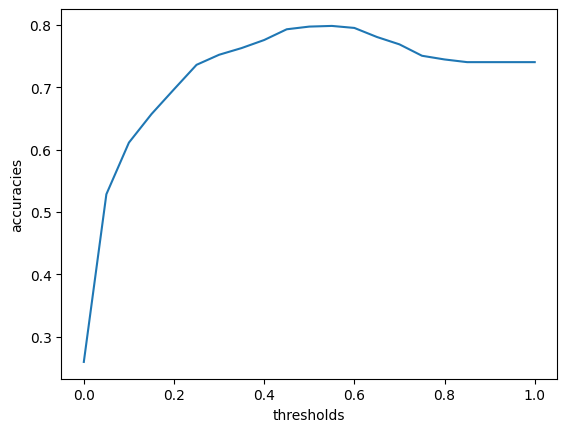

In [70]:
plt.plot(thresholds, accuracies)
plt.xlabel('thresholds')
plt.ylabel('accuracies')

In [73]:
# now we will see accuracy for the small model that we had created

val_dict_small = df_val[small_subset].to_dict(orient = 'records')

X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

churn_small = y_pred_small >= 0.5
accuracy_score(y_val, churn_small)

# hence accuracy of our small model is 0.765 which is 76.5%

0.7650537634408602

In [75]:
# DUMMY BASELINE , now we will create a dummy model , which will always output one value regardless of feature
# here our data is imbalanced and majority users have not churned so our DUMMY MODEL will always predict majority class
# hence it will always display FALSE that is " NO CHURN "

size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [76]:
accuracy_score(y_val, baseline)
# hence our baseline score is 74%

0.7403225806451613

---------------------------------------------------------------

 ***`CONFUSION MATRIX / TABLE`***

---------------------------------------------------------------

In [84]:
t = 0.5

predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

# dont use and , instead use " & " to do it and elementwise

true_positives = (predict_churn & actual_churn).sum()
true_negatives = (predict_no_churn & actual_no_churn).sum()

false_positives = (predict_churn & actual_no_churn).sum()
false_negatives = (predict_no_churn & actual_churn).sum()

print(f"tp : {true_positives}, tn : {true_negatives}, fp : {false_positives}, fn : {false_negatives}")

tp : 258, tn : 1225, fp : 152, fn : 225


In [86]:
confusion_table = np.array([
    [true_positives, false_positives],
    [false_negatives, true_negatives]
])

print(confusion_table)

'''
          TP    FP
          FN    TN

'''

[[ 258  152]
 [ 225 1225]]


In [89]:
(confusion_table / confusion_table.sum()) * 100

# TP -> 13.87%
# FP -> 8.17%
# FN -> 12.09%
# TN -> 65.86%

array([[13.87096774,  8.17204301],
       [12.09677419, 65.86021505]])

precision = TP / (TP + FP)                                      
recall = sensitivity = true positive rate = TP / (TP + FN)      
specificity = TN / (TN + FP)

In [90]:
# OTHER METRICS other than accuracy
# The precision of a model tells us how many of the positive predictions turned out to be correct.

precision = true_positives/(true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print(f"precision : {precision} , recall : {recall} , specificity : {specificity}")

precision : 0.6292682926829268 , recall : 0.5341614906832298 , specificity : 0.8896151053013798


**Precision** helps us understand how many people received a promotional message by
mistake. The better the precision, the fewer false positives there are. The precision of 62%                                
means that 62% of the reached customers indeed were going to churn (our true positives),
while the remaining 38% were not (false positives).                                                            
**Recall** helps us understand how many of the churning customers we failed to find. The
better the recall, the fewer false negatives there are. The recall of 59% means that we reach
only 59% of all churning users (true positives) and fail to identify the remaining 41% (false
negatives)

In [94]:
scores = []
thresholds  = np.linspace(0, 1, 101)

for threshold in thresholds:
  tp = ((y_pred >= threshold) & (y_val == 1)).sum()
  fp = ((y_pred >= threshold) & (y_val == 0)).sum()
  fn = ((y_pred < threshold) & (y_val == 1)).sum()
  tn = ((y_pred < threshold) & (y_val == 0)).sum()
  scores.append((threshold, tp, fp, fn, tn))

print(scores)

[(0.0, 483, 1377, 0, 0), (0.01, 481, 1193, 2, 184), (0.02, 479, 1065, 4, 312), (0.03, 473, 983, 10, 394), (0.04, 469, 924, 14, 453), (0.05, 468, 862, 15, 515), (0.06, 466, 815, 17, 562), (0.07, 462, 787, 21, 590), (0.08, 458, 754, 25, 623), (0.09, 455, 713, 28, 664), (0.1, 451, 691, 32, 686), (0.11, 449, 665, 34, 712), (0.12, 447, 643, 36, 734), (0.13, 445, 623, 38, 754), (0.14, 440, 608, 43, 769), (0.15, 439, 594, 44, 783), (0.16, 434, 576, 49, 801), (0.17, 429, 559, 54, 818), (0.18, 421, 536, 62, 841), (0.19, 415, 513, 68, 864), (0.2, 411, 492, 72, 885), (0.21, 406, 471, 77, 906), (0.22, 404, 448, 79, 929), (0.23, 399, 425, 84, 952), (0.24, 395, 410, 88, 967), (0.25, 388, 396, 95, 981), (0.26, 380, 383, 103, 994), (0.27, 376, 373, 107, 1004), (0.28, 372, 360, 111, 1017), (0.29, 366, 352, 117, 1025), (0.3, 362, 340, 121, 1037), (0.31, 358, 325, 125, 1052), (0.32, 356, 320, 127, 1057), (0.33, 355, 311, 128, 1066), (0.34, 350, 303, 133, 1074), (0.35000000000000003, 336, 294, 147, 1083),

In [96]:
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [97]:
df_scores[::10]

'''
[::10]: This slicing notation consists of three parts: start:stop:step.

start: The first colon : is empty, which means it starts from the beginning of the DataFrame.

stop: The second colon : is also empty, which means it goes until the end of the DataFrame.

step: The 10 here specifies that it selects every 10th row.

'''

,threshold,tp,fp,fn,tn
0,0.0,483,1377,0,0
10,0.1,451,691,32,686
20,0.2,411,492,72,885
30,0.3,362,340,121,1037
40,0.4,318,252,165,1125
50,0.5,258,152,225,1225
60,0.6,191,89,292,1288
70,0.7,82,29,401,1348
80,0.8,8,0,475,1377
90,0.9,0,0,483,1377


ROC AND AUC

ROC -> reciever operator characteristics  

AUC -> area under curve

TPR --> TRUE positive rate = sensitivity = recall              
FPR --> FALSE positive rate  = 1 - specificity

FPR = 1 - TN / (TN + FP) = FP / (TN + FP)

FPR = FP / (FP + TN)

In [98]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [99]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,483,1377,0,0,1.000000,1.000000
10,0.1,451,691,32,686,0.933747,0.501816
20,0.2,411,492,72,885,0.850932,0.357298
30,0.3,362,340,121,1037,0.749482,0.246914
40,0.4,318,252,165,1125,0.658385,0.183007
50,0.5,258,152,225,1225,0.534161,0.110385
60,0.6,191,89,292,1288,0.395445,0.064633
70,0.7,82,29,401,1348,0.169772,0.021060
80,0.8,8,0,475,1377,0.016563,0.000000
90,0.9,0,0,483,1377,0.000000,0.000000


Text(0.5, 0, 'thresholds')

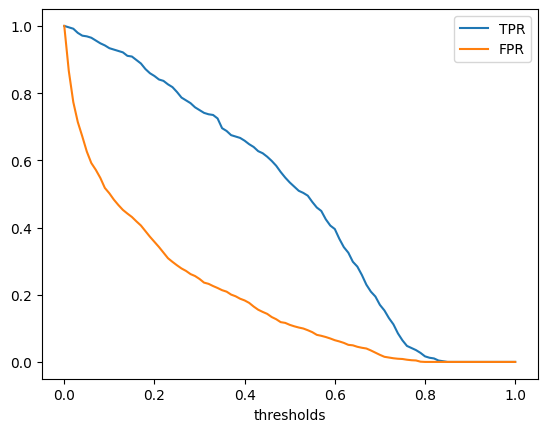

In [101]:
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()
plt.xlabel('thresholds')

At the threshold of 0.0, we treat everybody as churning. Both TPR and FPR are 100%

As the threshold grows, both metrics decline, but at different rates.

Ideally, FPR should go down very fast. A small FPR indicates that the model makes very
few mistakes predicting negative examples (false positives).           

On the other hand, TPR should go down slowly, ideally staying near 100% all the time:
that will mean that the model predicts true positives very well.

---------------------------------------------------------------

***`RANDOM BASELINE MODEL`***

In [102]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores = []

  thresholds = np.linspace(0, 1, 101)

  for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
  df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

  df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
  df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

  return df_scores

In [103]:
np.random.seed(42)
y_rand = np.random.uniform(0, 1, size=len(y_val)) # Generate an array with random numbers between 0 and 1.

df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,483,1377,0,0,1.000000,1.000000
10,0.1,427,1233,56,144,0.884058,0.895425
20,0.2,374,1087,109,290,0.774327,0.789397
30,0.3,328,957,155,420,0.679089,0.694989
40,0.4,287,819,196,558,0.594203,0.594771
50,0.5,243,697,240,680,0.503106,0.506173
60,0.6,200,562,283,815,0.414079,0.408134
70,0.7,143,410,340,967,0.296066,0.297749
80,0.8,104,277,379,1100,0.215321,0.201162
90,0.9,54,134,429,1243,0.111801,0.097313


Text(0.5, 0, 'thresholds')

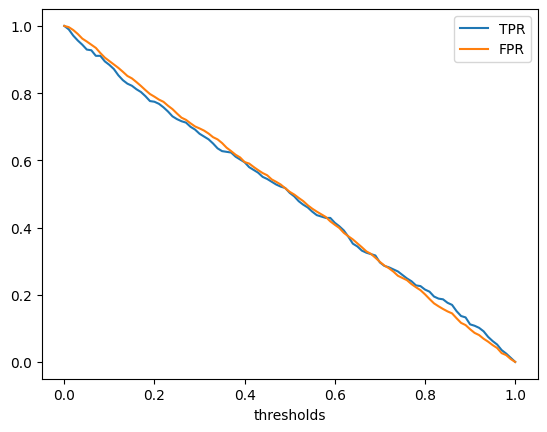

In [105]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()
plt.xlabel('thresholds')

---------------------------------------------------------------

***`THE IDEAL MODEL`***

In [107]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, (num_neg + num_pos))

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,483,1377,0,0,1.000000,1.000000
10,0.1,483,1191,0,186,1.000000,0.864924
20,0.2,483,1005,0,372,1.000000,0.729847
30,0.3,483,819,0,558,1.000000,0.594771
40,0.4,483,633,0,744,1.000000,0.459695
50,0.5,483,447,0,930,1.000000,0.324619
60,0.6,483,261,0,1116,1.000000,0.189542
70,0.7,483,75,0,1302,1.000000,0.054466
80,0.8,372,0,111,1377,0.770186,0.000000
90,0.9,186,0,297,1377,0.385093,0.000000


Text(0.5, 0, 'thresholds')

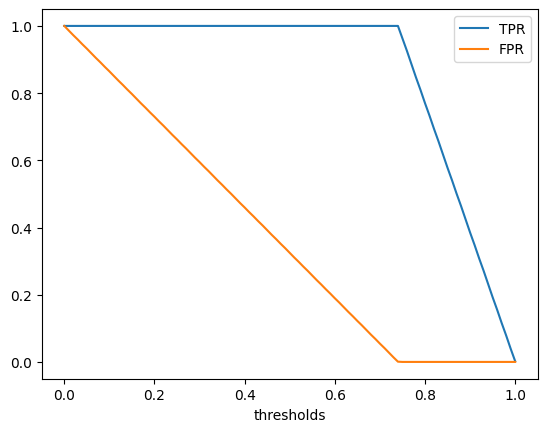

In [109]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()
plt.xlabel('thresholds')

# see below the ideal line is where there are vertices because at that point TPR = 100% and FPR = 0%
# means all churning are predicted as churning and all non-churning are classified as non-churning

# here that vertice point is almost 0.74

# from 0 to 0.74 we always correctly classify churning ones as churning but incorrectly classify non churn as churn
# as we go near to 0.74 our FPR starts decreasing and we improve in classifying non churn as non churn

# at 0.74 its ideal we classify all churn as churn and non-churn as non-churn so tpr:100 and fpr:0

# after 0.74 to 1.0 we always correctly classify all non-churning ones
# but after 0.74 we incorrectly start classifying churning ones as non-churning so TPR goes down

---------------------------------------------------------------

***ROC CURVE : reciever operator characteristics***

ROC curve : plots TPR at y-axis and FPR at x-axis and plots points for different thresholds

and with the help of this curve we choose threshold as per our need what is our usecase

***AUC*** is AREA UNDER CURVE it tells us which is better , greater the area better the model is

if logistic regression has greater area than random_forest than logistic regression is better fit for our churn prediction problem

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

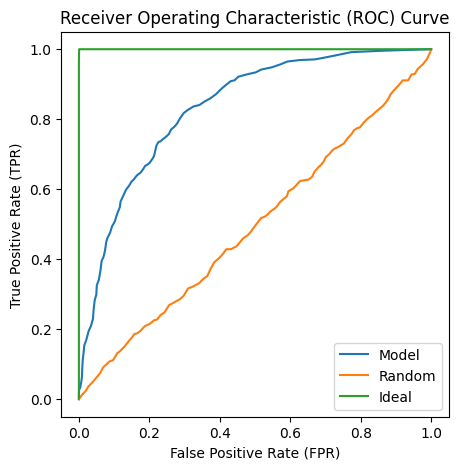

In [112]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

Text(0, 0.5, 'True Positive Rate (TPR)')

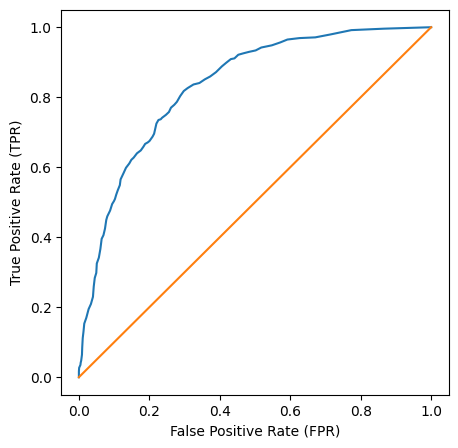

In [119]:
# rather than creating a random model all the time we can just connect  [0,1] and [1,1] it serves as baseline

plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

In [120]:
# we dont always need to implement it in sklearn.metrics there is roc_curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

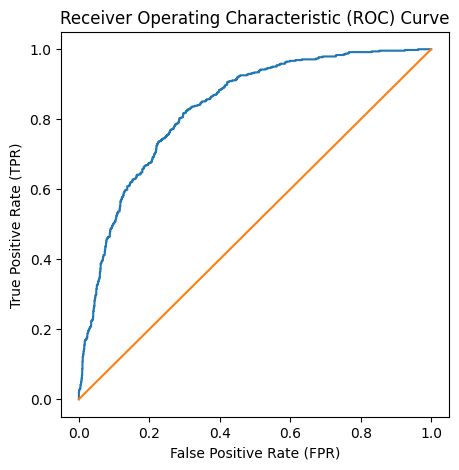

In [121]:
plt.figure(figsize = (5,5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# ideal point is (0, 1) which is the ideal threshold

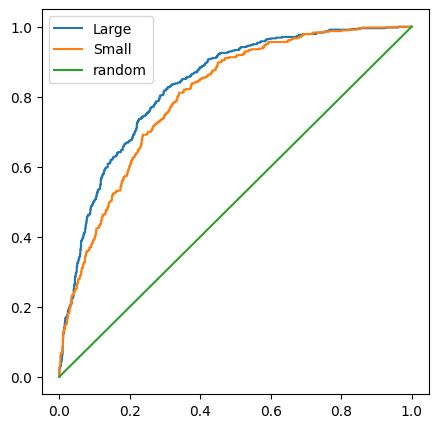

In [125]:
# now lets take a look at our small model that we made and all larger model

fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))
plt.plot(fpr_large, tpr_large, label='Large')
plt.plot(fpr_small, tpr_small, label='Small')
plt.plot([0, 1], [0, 1], label='random')
plt.legend()

GREATER THE ARE UNDER CURVE MEANS BETTER THE MODEL

ideally it should follow ideal model means it should have 100% AUC , and the random model is at half means it has 50% AUC

Our model will be near 50% and 100%

An **AUC of 0.9** is indicative of a reasonably ***good model***,

 **0.8** is ***OK***,

  **0.7** is ***not very performant***,
  
and **0.6** indicates quite ***poor performance***

In [126]:
from sklearn.metrics import auc

auc(df_scores.fpr, df_scores.tpr)

0.8325823082856331

In [128]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, y_pred)


0.8323522645773285

In [129]:
roc_auc_score(y_val, y_pred_small) # auc value of smaller subset model that we made that had few features

0.8011211999560963

Suppose we randomly pick a customer that we know churned and a customer who didn’t,
then apply the model to these customers and see what the score is for each. We want the
model to score the churning customer higher than the non-churning one. AUC tells us the
probability of that happening: it’s the probability that the score of a randomly selected
churning customer is higher than the score of a randomly selected non-churning one

In [134]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

# print(neg)
# print(pos)

np.random.seed(42)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)

print()
(pos[pos_choice] > neg[neg_choice]).mean()

0.8365

This interpretation of AUC gives us additional insight into the quality of our models. The
ideal model orders all the customers such that we first have non-churning customers and then
churning customers. With this order, the AUC is always 1.0: the score of a randomly chosen
churning customer is always higher than the score of a non-churning customer. On the other
hand, the random model just shuffles the customers, so the score of a churning customer has
only a 50% chance of being higher than the score of a non-churning one.
AUC thus not only gives us a way of evaluating the models at all possible thresholds, but
also describes how well the model separates two classes: in our case, churning and non churning. If the separation is good, then we can order the customers such that most of the
churning users come first. Such a model will have a good AUC score.

---------------------------------------------------------------

K-FOLD CROSS VALIDATION

In [143]:
def train(df, y):
 cat = df[categorical + numerical].to_dict(orient='records')

 dv = DictVectorizer(sparse=False)
 dv.fit(cat)

 X = dv.transform(cat)

 model = LogisticRegression(solver='liblinear')
 model.fit(X, y)
 return dv, model

In [144]:
def predict(df, dv, model):
 cat = df[categorical + numerical].to_dict(orient='records')

 X = dv.transform(cat)
 y_pred = model.predict_proba(X)[:, 1]

 return y_pred

In [145]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

aucs = []
for train_idx, val_idx in kfold.split(df_train_full):
 df_train = df_train_full.iloc[train_idx]
 df_val = df_train_full.iloc[val_idx]

 y_train = df_train.churn.values
 y_val = df_val.churn.values

 dv, model = train(df_train, y_train)
 y_pred = predict(df_val, dv, model)

 auc = roc_auc_score(y_val, y_pred)
 aucs.append(auc)

In [146]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.841 ± 0.015


------------------------------------------------------------------------

FINDING BEST PARAMETERS

In [149]:
def train(df, y, C):
 cat = df[categorical + numerical].to_dict(orient='records')

 dv = DictVectorizer(sparse=False)
 dv.fit(cat)

 X = dv.transform(cat)

 model = LogisticRegression(solver='liblinear', C=C)
 model.fit(X, y)

 return dv, model

In [150]:
nfolds = 10
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=42)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
 aucs = []

 for train_idx, val_idx in kfold.split(df_train_full):
  df_train = df_train_full.iloc[train_idx].reset_index(drop=True)
  df_val = df_train_full.iloc[val_idx].reset_index(drop=True)

  y_train = df_train.churn.values
  y_val = df_val.churn.values

  dv, model = train(df_train, y_train, C=C)
  y_pred = predict(df_val, dv, model)

  auc = roc_auc_score(y_val, y_pred)
  aucs.append(auc)

 print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.824 ± 0.017
C=0.01, auc = 0.839 ± 0.016
C=0.1, auc = 0.841 ± 0.015
C=0.5, auc = 0.841 ± 0.015
C=1, auc = 0.841 ± 0.015
C=10, auc = 0.841 ± 0.015


 we see is that after C=0.1 the average AUC is the same and doesn’t grow anymore.
However, the standard deviation is smaller for C=0.5 than for C=0.1, so we should use
that. The reason we prefer C=0.5 to C=1 and C=10 is simple: when the C parameter is small,
the model is more regularized. The weights of this model are more restricted, so in general
they are smaller. Small weights in the model give us additional assurance that the model will
behave well when we use it on real data.
So we select C=0.5.

In [152]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

print('auc = %.3f' % auc)

#hence we were able to increase to 86.1%

auc = 0.861
